In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = True
X=10
currency_pair = 'USD=X'
numbers_in_currency = 'USD'
share_name = 'BWA'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date', 'real_date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares,real_date
0,2014-06-30,2197,-1724,473,200,771,1572,528,3038,1244,...,0,525,16,2170,704,3628,280,-131,260.05312,2014-08-04
1,2014-09-30,2032,-1608,425,173,783,1466,532,2952,1211,...,0,588,18,2124,706,3552,220,-141,260.05312,2014-11-04
2,2014-12-31,1992,-1579,413,147,798,1444,506,2972,1206,...,0,601,23,2168,716,3612,256,-165,260.05312,2015-02-14
3,2015-03-31,1984,-1555,429,188,1036,1565,506,3326,1169,...,0,89,19,1602,1731,4019,33,-140,256.33840,2015-05-05
4,2015-06-30,2032,-1603,429,157,1108,1573,526,3402,1185,...,0,60,12,1636,1732,4080,287,-145,256.33840,2015-08-04


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
36,2023-06-30,2023-08-04,234.4,2874,-2367,507,204,848,3871,1860,...,1002,17317,2725,62,3,4235,4191,9766,280,-242
37,2023-09-30,2023-11-04,234.4,3622,-2970,652,105,949,3367,1328,...,557,14104,2396,60,3,3573,3665,8336,176,-104
38,2023-12-31,2024-02-14,234.4,3522,-2863,659,170,1534,3127,1313,...,564,14453,2546,70,3,3767,3707,8625,868,-208
39,2024-03-31,2024-04-29,228.3,3595,-2951,644,206,1037,3289,1333,...,540,14122,2378,445,0,3869,3295,8080,-118,-190
40,2024-06-30,2024-07-29,227.2,3603,-2918,685,303,1288,3111,1322,...,0,14108,2202,445,0,3712,3283,7823,344,-355


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
if currency_pair != 'USD=X':
    data['usd_nat_currency'] = utils.daily_price(
        ticker=currency_pair,
        end=data['date'],
        days_earlier=90
        )
else:
    data['usd_nat_currency'] = [1 for x in range(len(data))]

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2023-06-30,2023-08-04,234.4,2874,-2367,507,204,848,3871,1860,...,17317,2725,62,3,4235,4191,9766,280,-242,1
37,2023-09-30,2023-11-04,234.4,3622,-2970,652,105,949,3367,1328,...,14104,2396,60,3,3573,3665,8336,176,-104,1
38,2023-12-31,2024-02-14,234.4,3522,-2863,659,170,1534,3127,1313,...,14453,2546,70,3,3767,3707,8625,868,-208,1
39,2024-03-31,2024-04-29,228.3,3595,-2951,644,206,1037,3289,1333,...,14122,2378,445,0,3869,3295,8080,-118,-190,1
40,2024-06-30,2024-07-29,227.2,3603,-2918,685,303,1288,3111,1322,...,14108,2202,445,0,3712,3283,7823,344,-355,1


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2023-06-30,2023-08-04,234.4,2874.0,-2367.0,507.0,204.0,848.0,3871.0,1860.0,...,17317.0,2725.0,62.0,3.0,4235.0,4191.0,9766.0,280.0,-242.0,1
37,2023-09-30,2023-11-04,234.4,3622.0,-2970.0,652.0,105.0,949.0,3367.0,1328.0,...,14104.0,2396.0,60.0,3.0,3573.0,3665.0,8336.0,176.0,-104.0,1
38,2023-12-31,2024-02-14,234.4,3522.0,-2863.0,659.0,170.0,1534.0,3127.0,1313.0,...,14453.0,2546.0,70.0,3.0,3767.0,3707.0,8625.0,868.0,-208.0,1
39,2024-03-31,2024-04-29,228.3,3595.0,-2951.0,644.0,206.0,1037.0,3289.0,1333.0,...,14122.0,2378.0,445.0,0.0,3869.0,3295.0,8080.0,-118.0,-190.0,1
40,2024-06-30,2024-07-29,227.2,3603.0,-2918.0,685.0,303.0,1288.0,3111.0,1322.0,...,14108.0,2202.0,445.0,0.0,3712.0,3283.0,7823.0,344.0,-355.0,1


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2014-08-04,47.057396,2014-06-30,2197.0,0.0,14.723915,260.05312,0.0,0.0,771.0,...,0.513477,0.486523,0.0,0.0,0.0,0.0,0.215294,0.091033,0.0,0.0
1,2014-08-11,47.239784,2014-06-30,2197.0,0.0,14.723915,260.05312,0.0,0.0,771.0,...,0.513477,0.486523,0.0,0.0,0.0,0.0,0.215294,0.091033,0.0,0.0
2,2014-08-18,47.292973,2014-06-30,2197.0,0.0,14.723915,260.05312,0.0,0.0,771.0,...,0.513477,0.486523,0.0,0.0,0.0,0.0,0.215294,0.091033,0.0,0.0
3,2014-08-25,47.262581,2014-06-30,2197.0,0.0,14.723915,260.05312,0.0,0.0,771.0,...,0.513477,0.486523,0.0,0.0,0.0,0.0,0.215294,0.091033,0.0,0.0
4,2014-09-01,48.123508,2014-06-30,2197.0,0.0,14.723915,260.05312,0.0,0.0,771.0,...,0.513477,0.486523,0.0,0.0,0.0,0.0,0.215294,0.091033,0.0,0.0


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2014-08-04,47.057396,2014-06-30,2197.0,0.0,14.723915,260.05312,0.0,0.0,771.0,...,0.0,0.215294,0.091033,0.0,0.0,inf,3.195984,1.392515,1.717618,inf
1,2014-08-11,47.239784,2014-06-30,2197.0,0.0,14.723915,260.05312,0.0,0.0,771.0,...,0.0,0.215294,0.091033,0.0,0.0,inf,3.208371,1.397912,1.723015,inf
2,2014-08-18,47.292973,2014-06-30,2197.0,0.0,14.723915,260.05312,0.0,0.0,771.0,...,0.0,0.215294,0.091033,0.0,0.0,inf,3.211984,1.399486,1.724589,inf
3,2014-08-25,47.262581,2014-06-30,2197.0,0.0,14.723915,260.05312,0.0,0.0,771.0,...,0.0,0.215294,0.091033,0.0,0.0,inf,3.209919,1.398587,1.723689,inf
4,2014-09-01,48.123508,2014-06-30,2197.0,0.0,14.723915,260.05312,0.0,0.0,771.0,...,0.0,0.215294,0.091033,0.0,0.0,inf,3.268391,1.424063,1.749166,inf


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

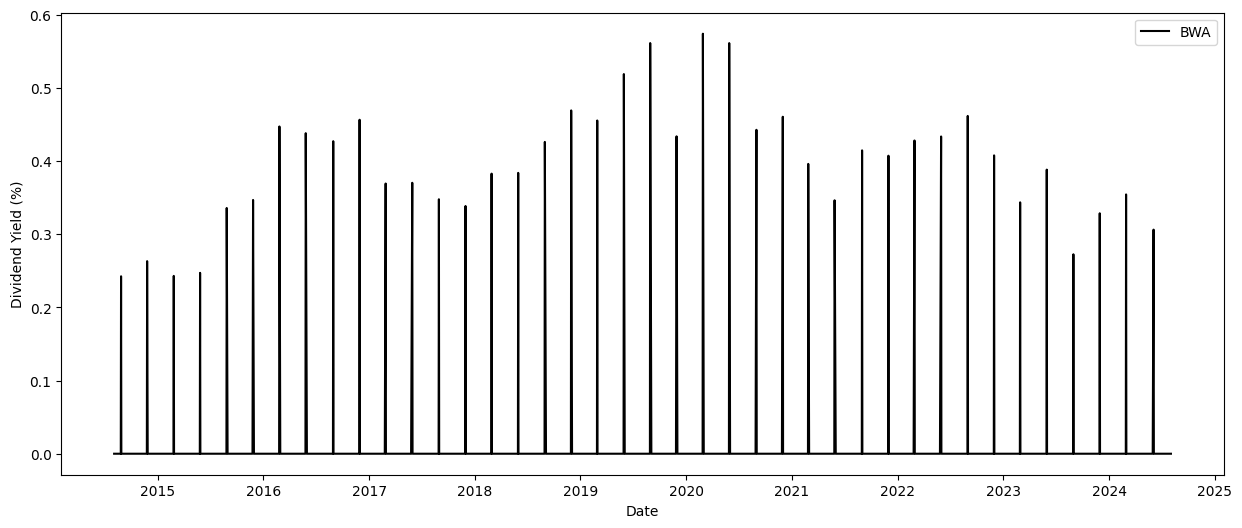

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate   NaN
share_price     NaN
Name: share_price, dtype: float64


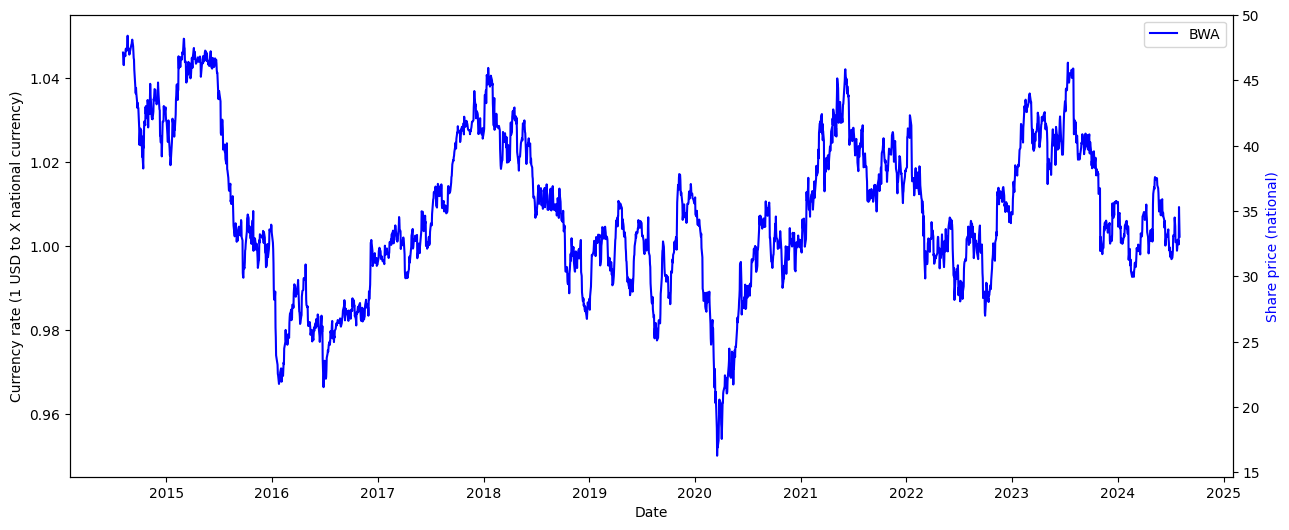

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

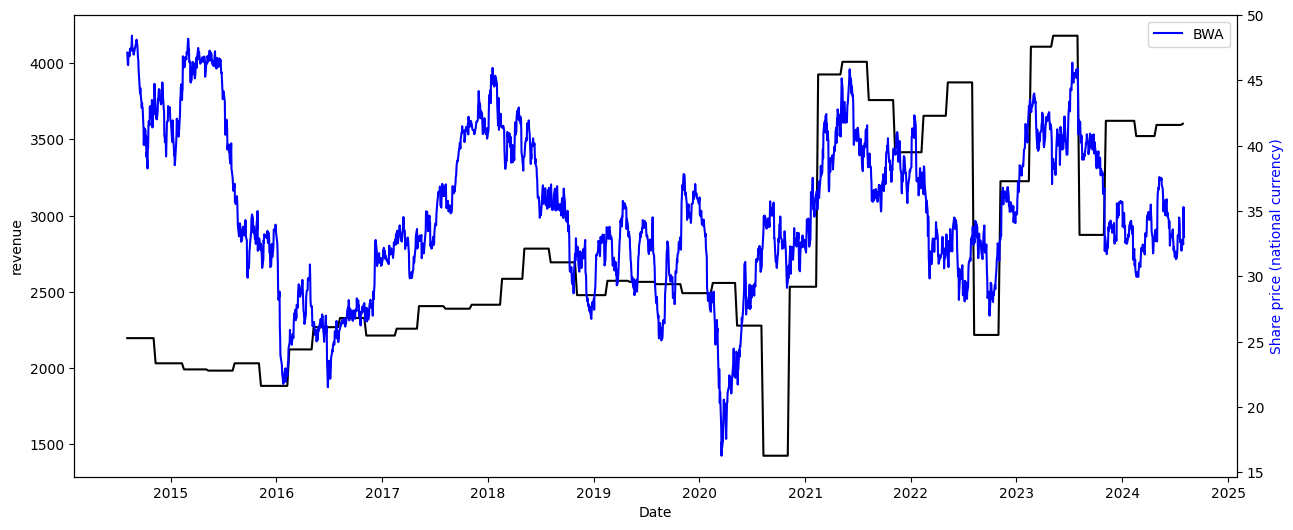

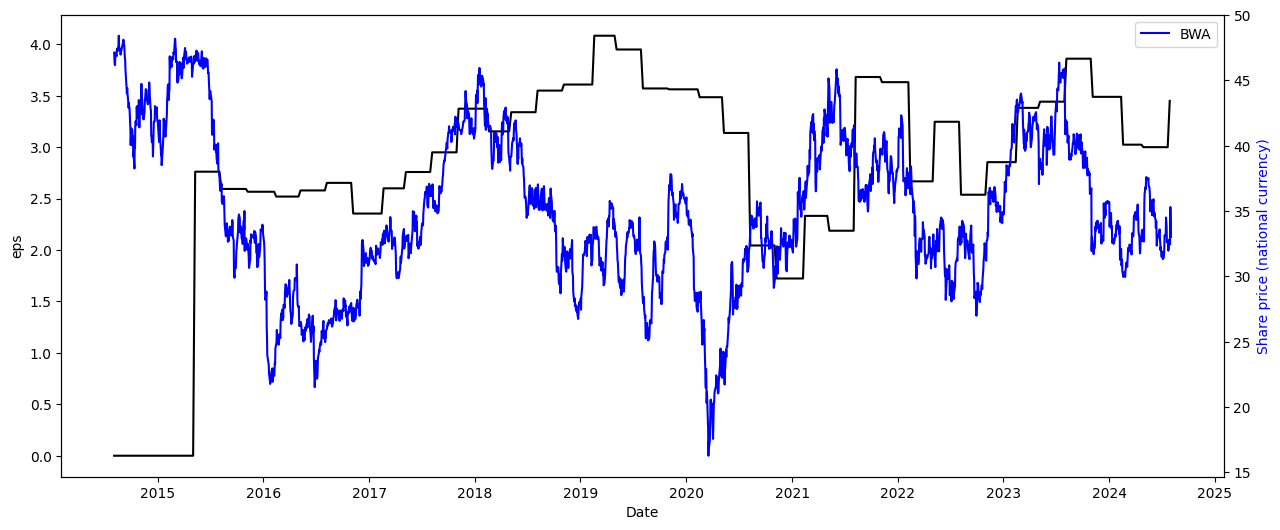

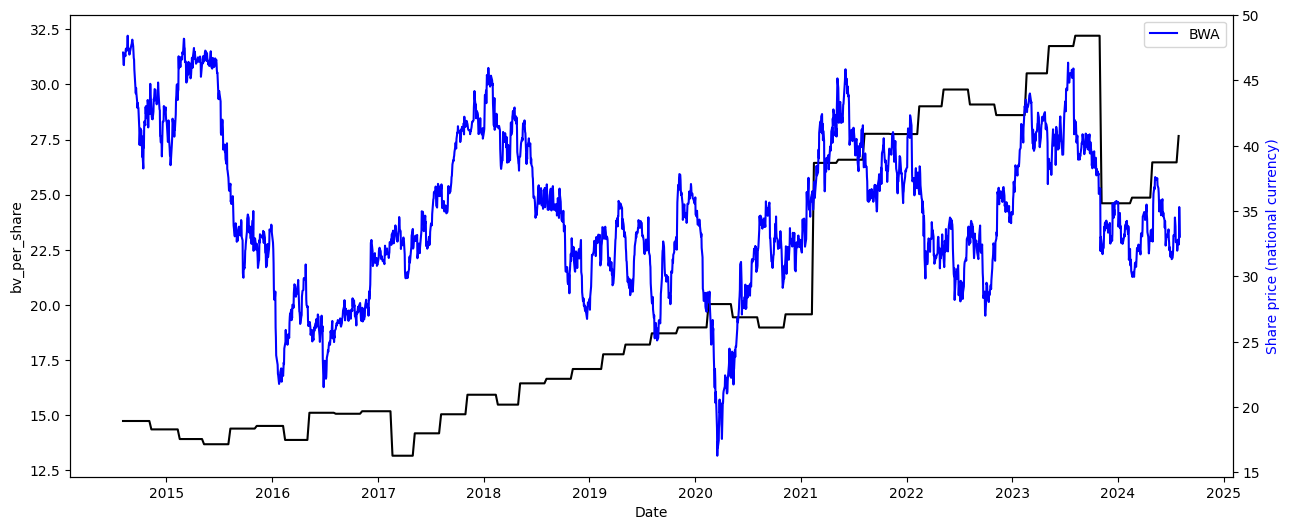

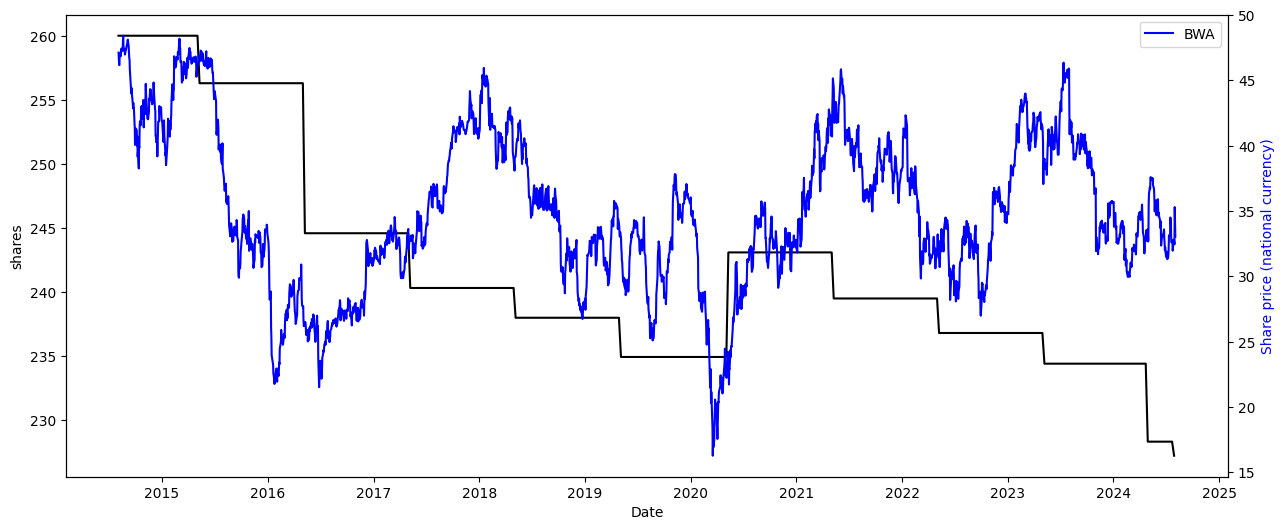

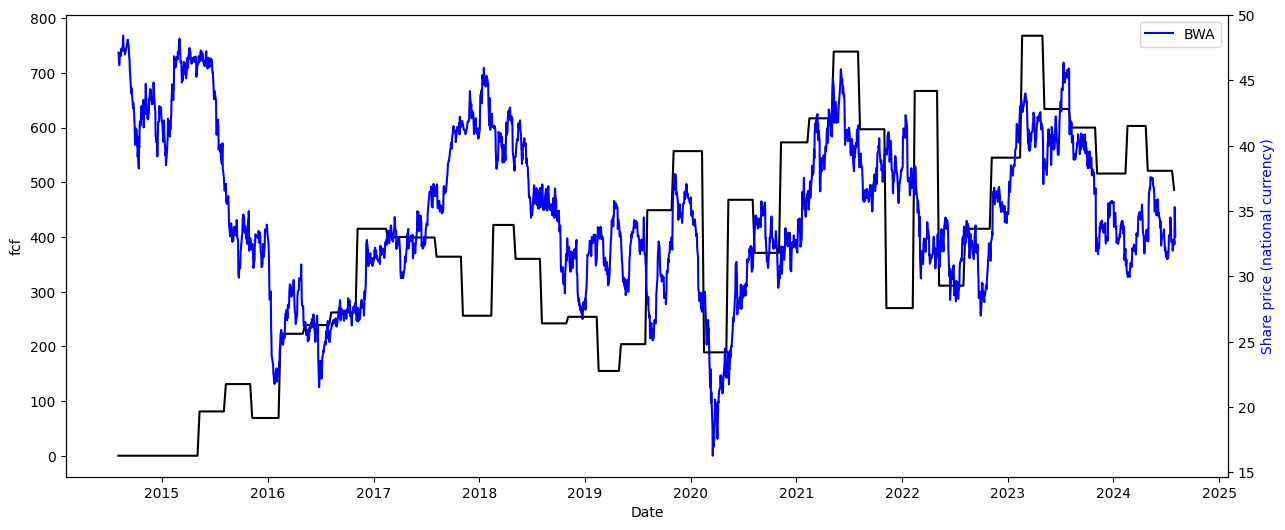

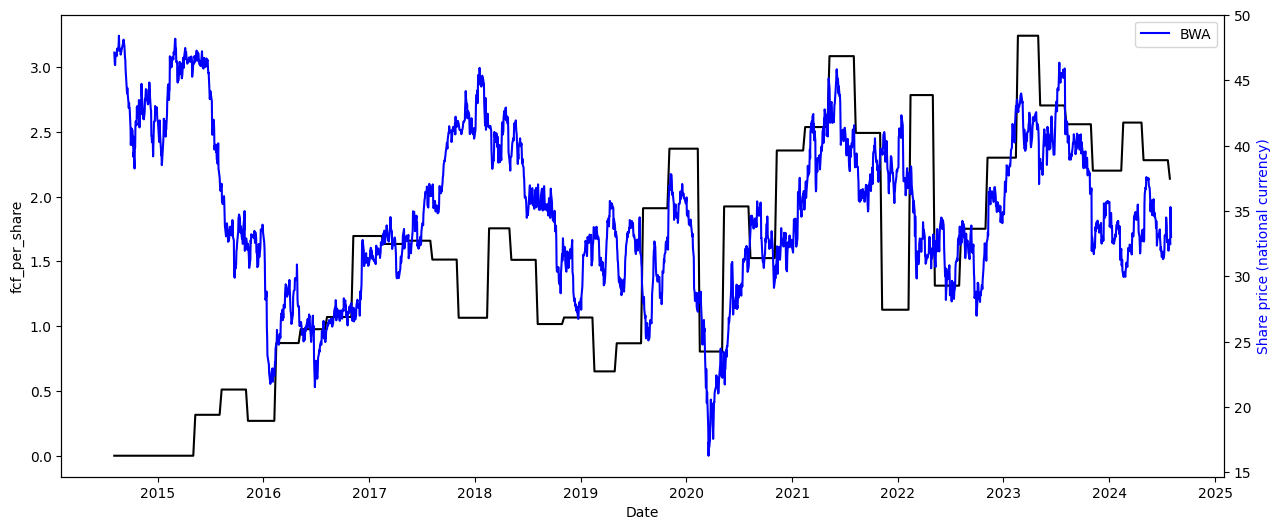

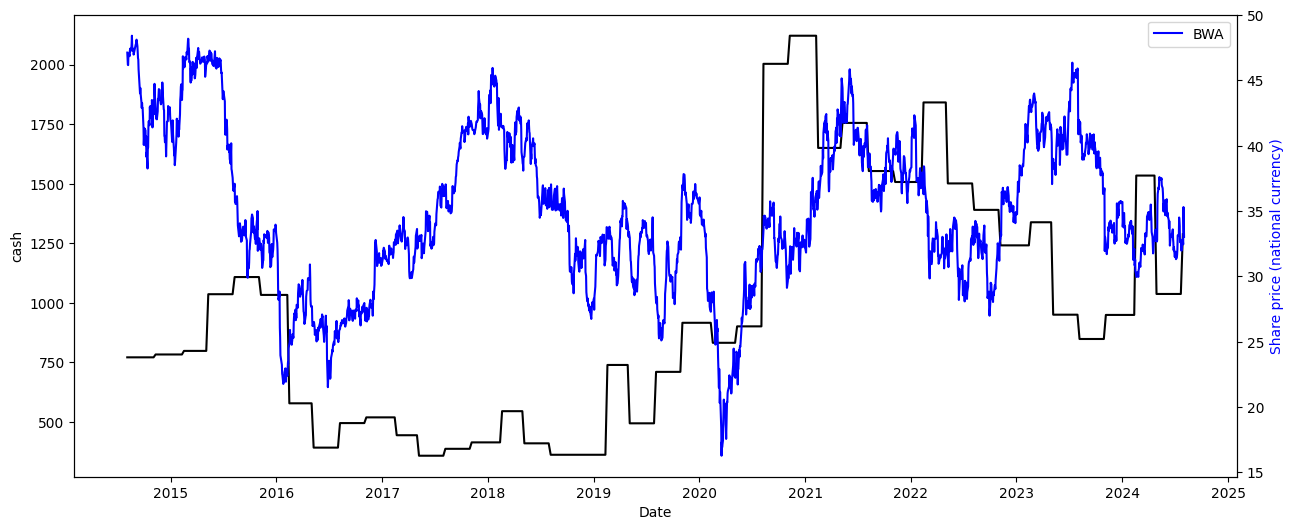

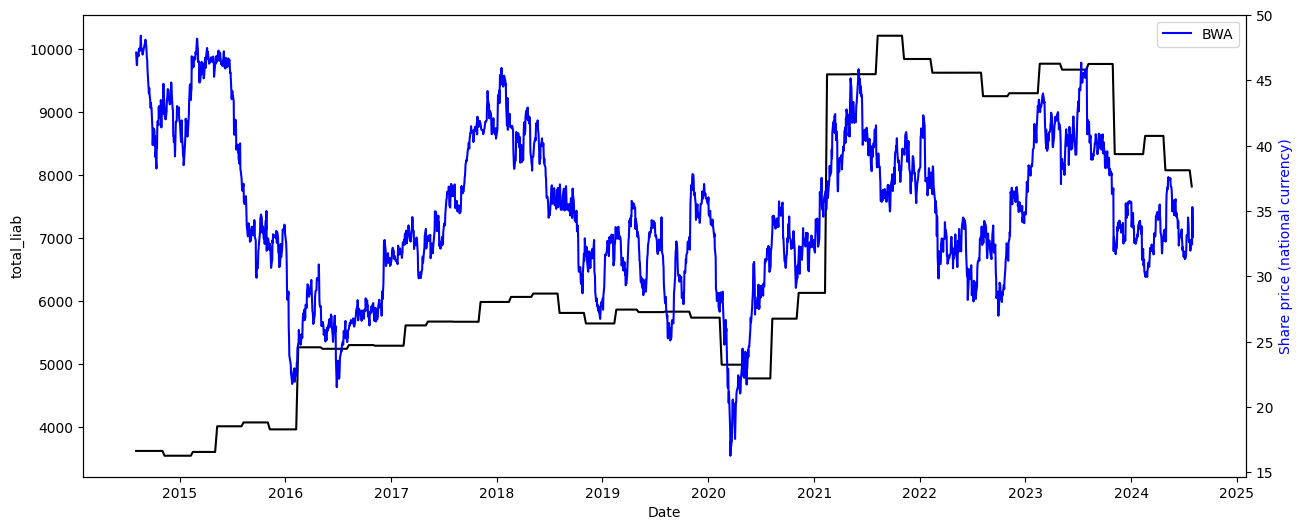

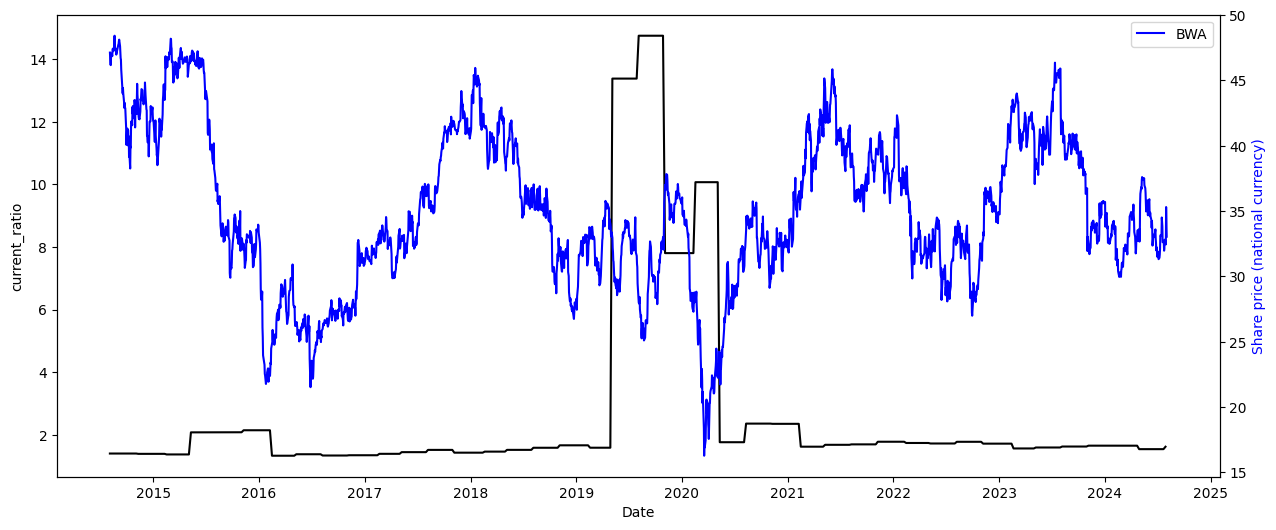

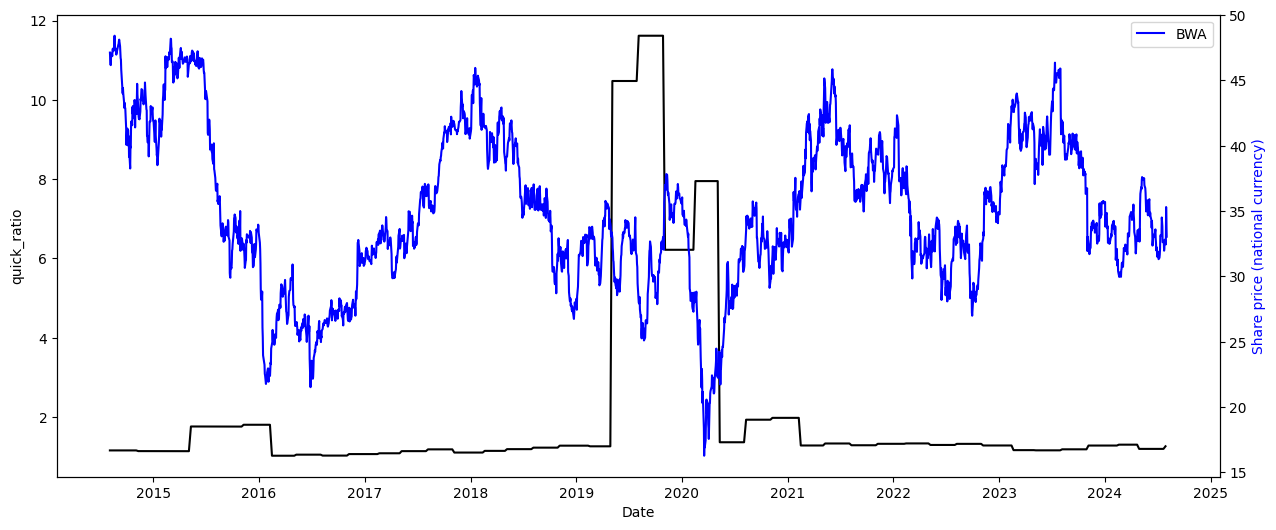

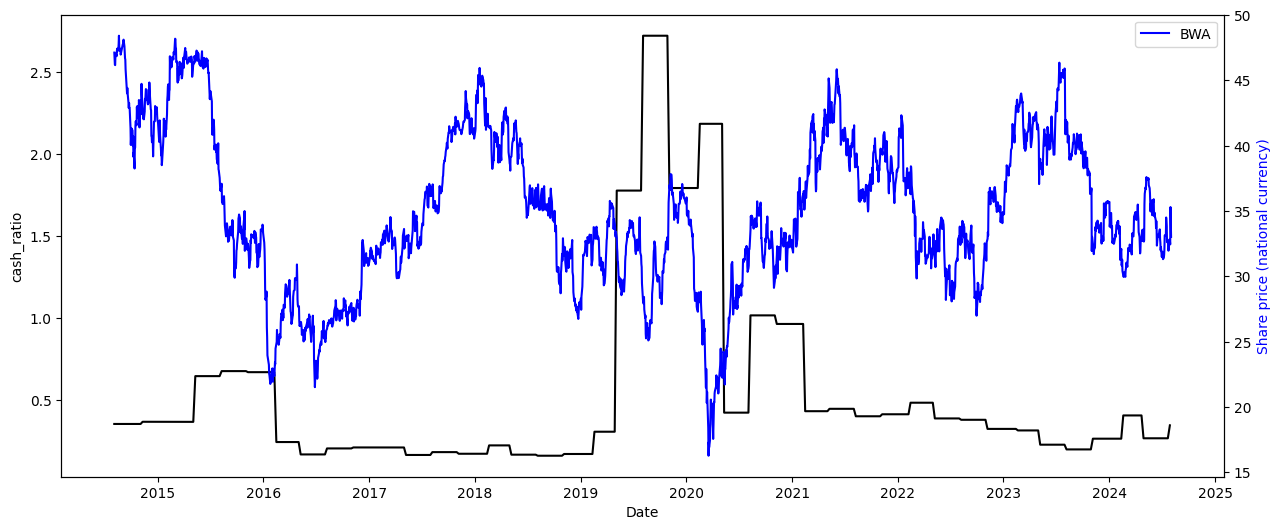

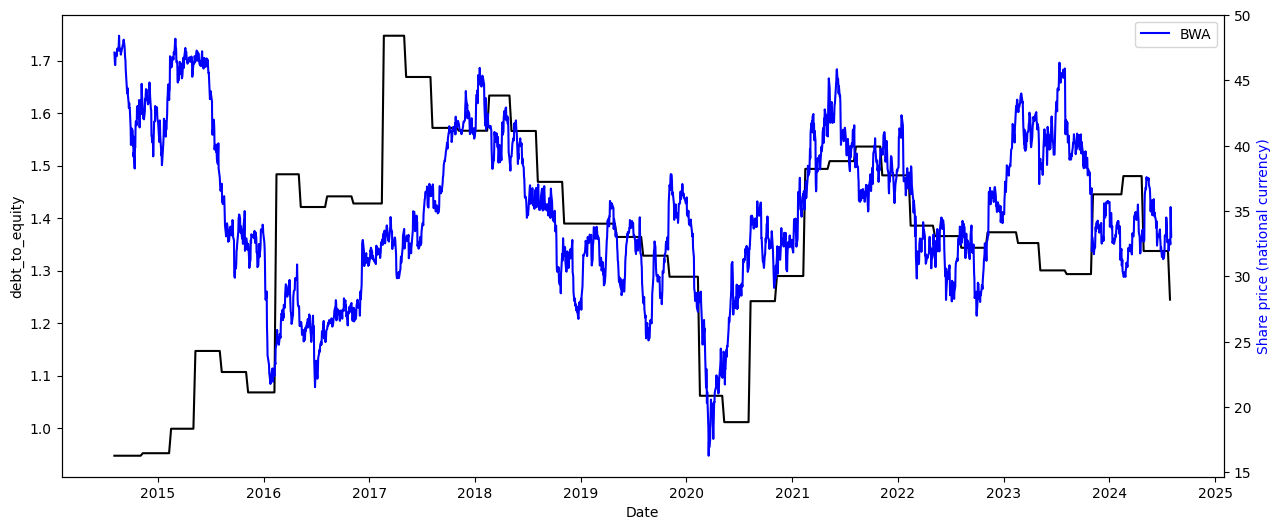

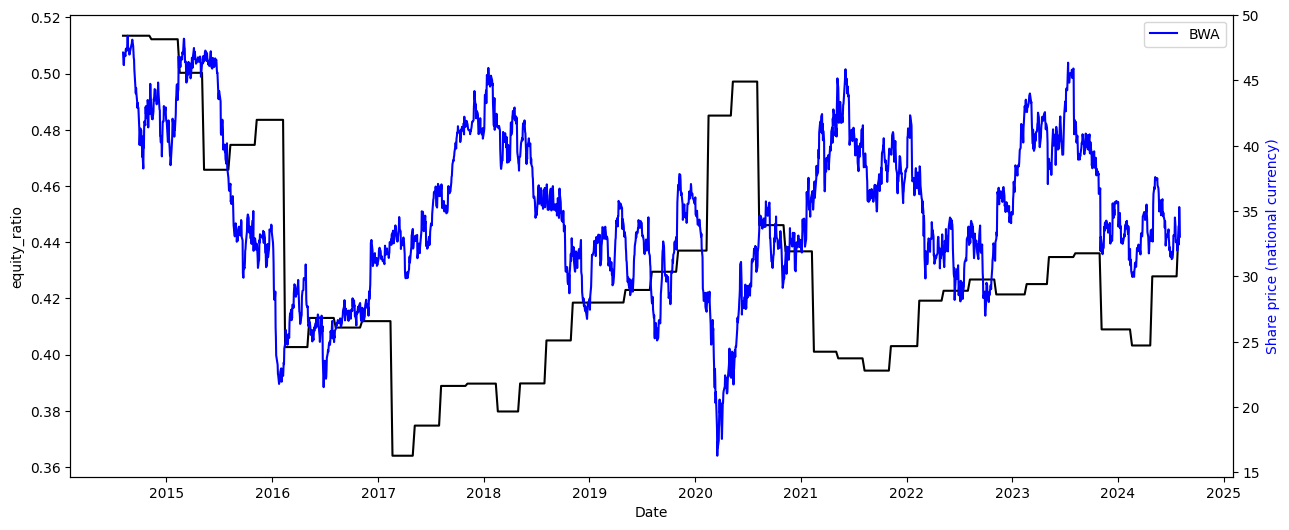

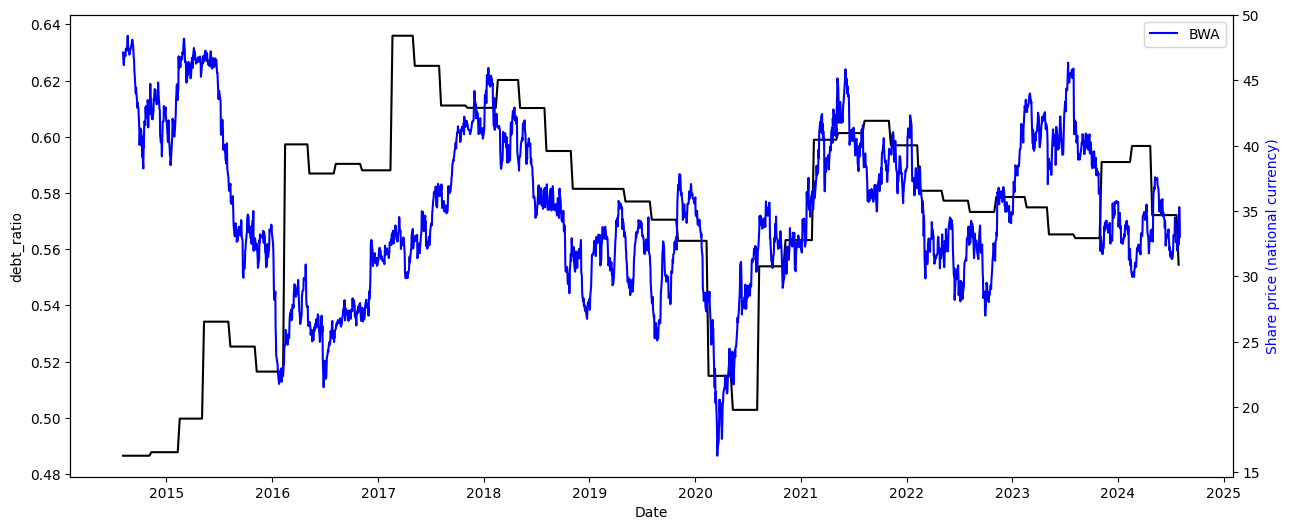

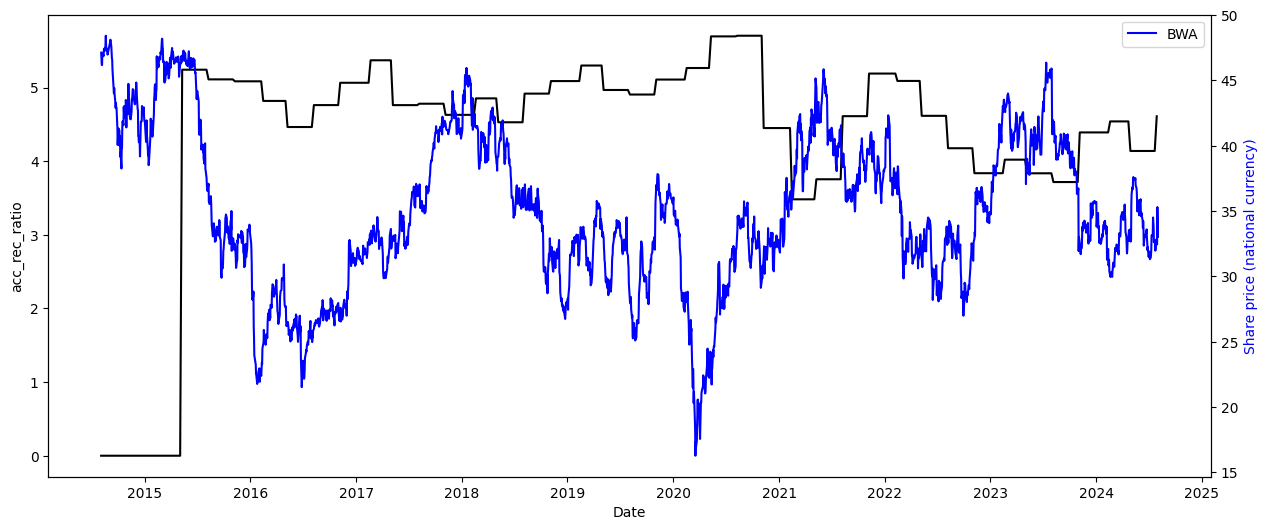

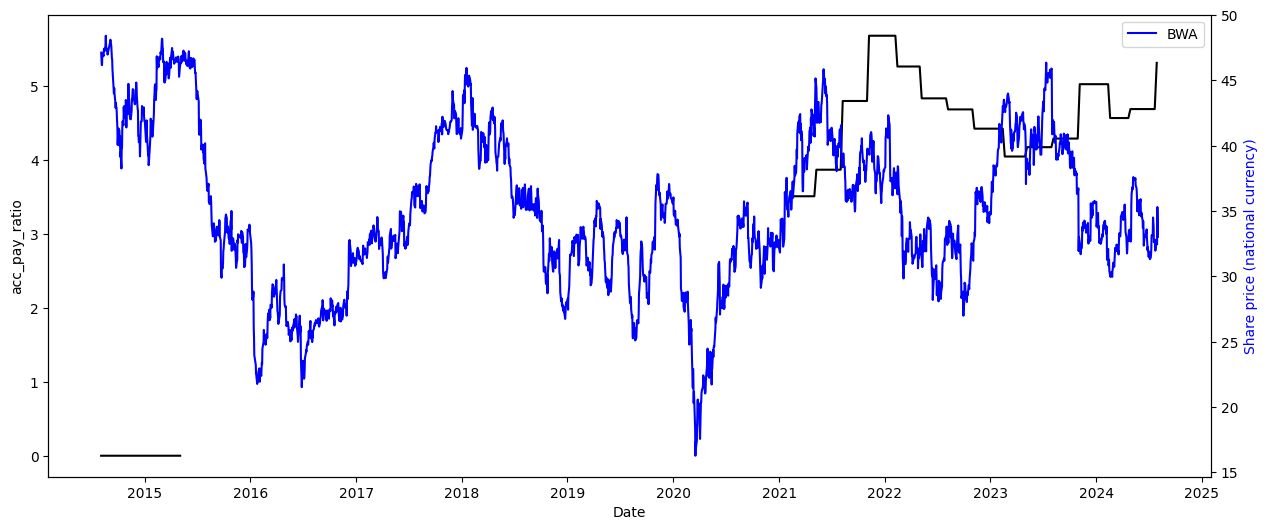

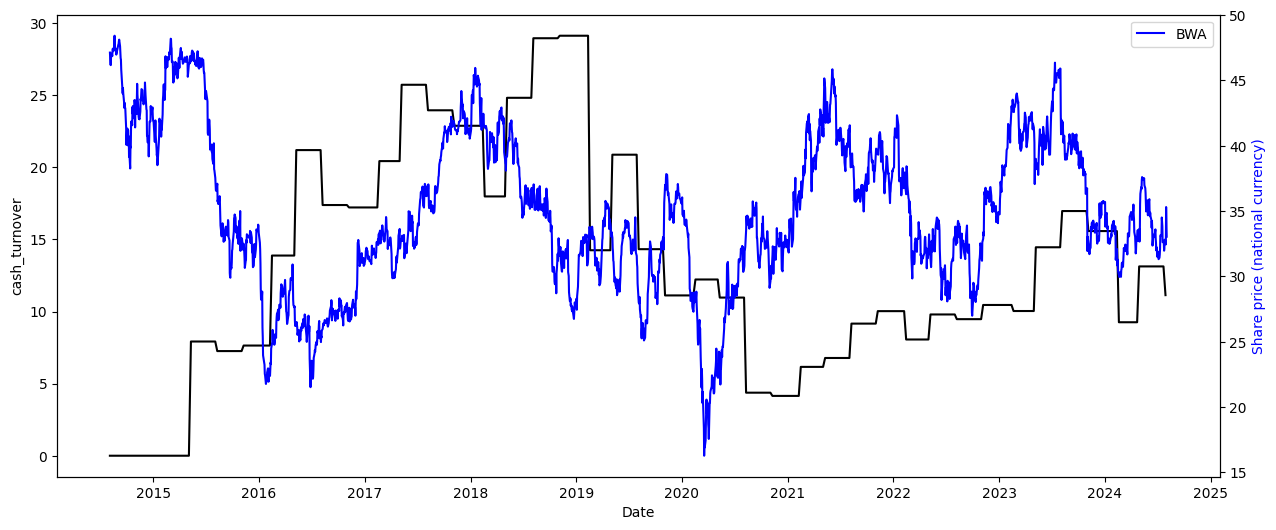

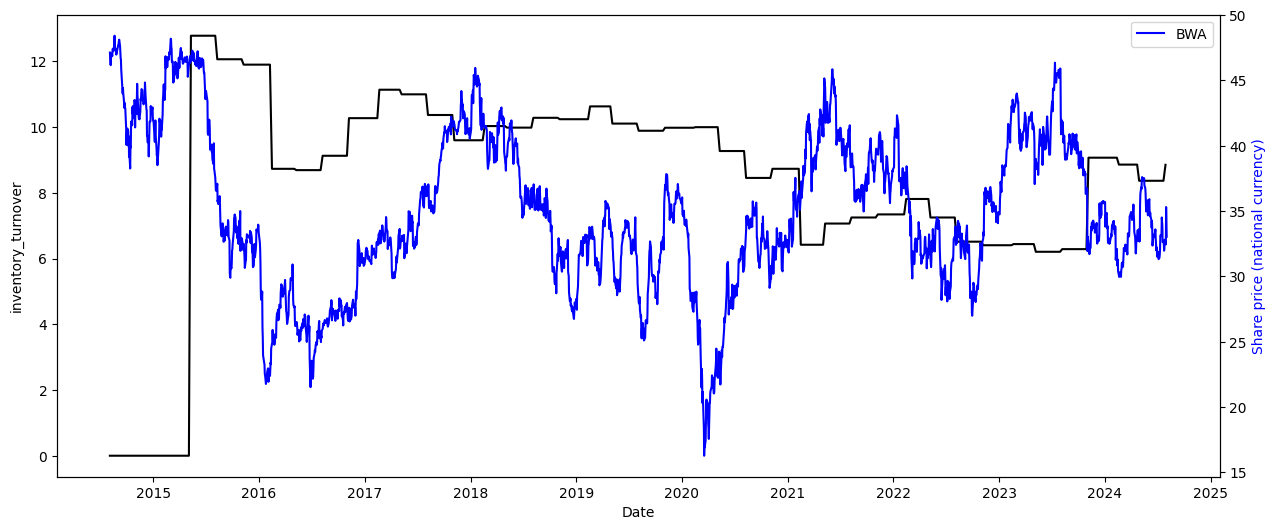

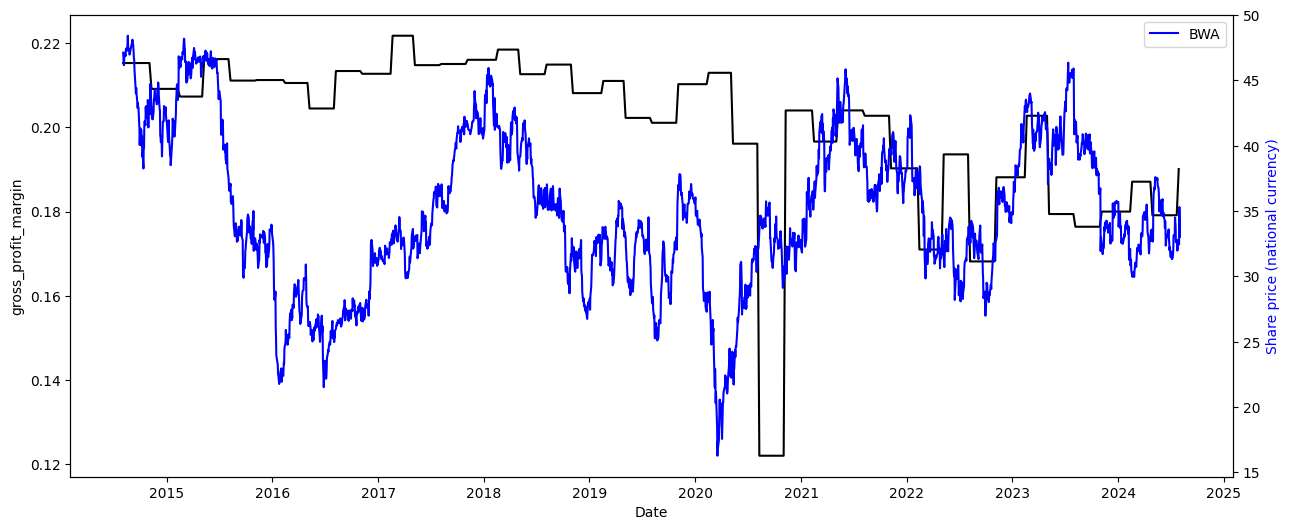

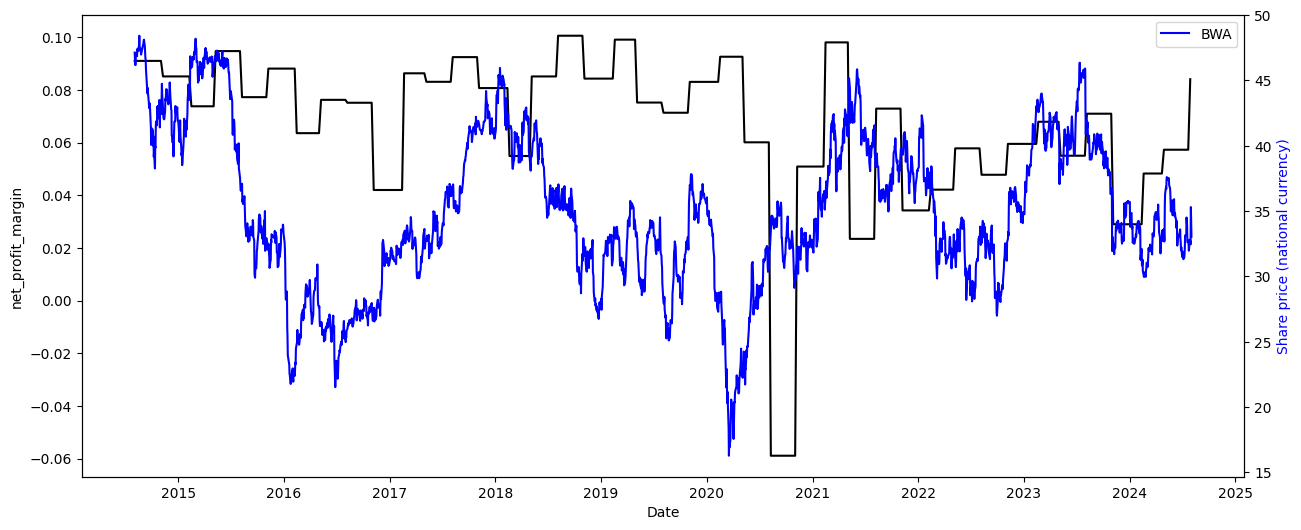

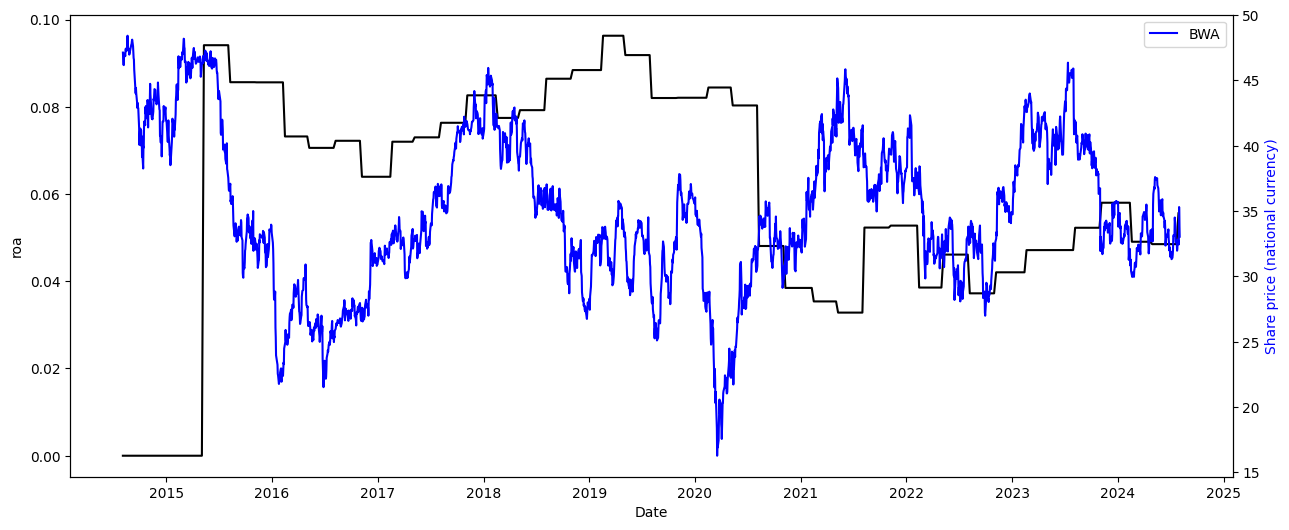

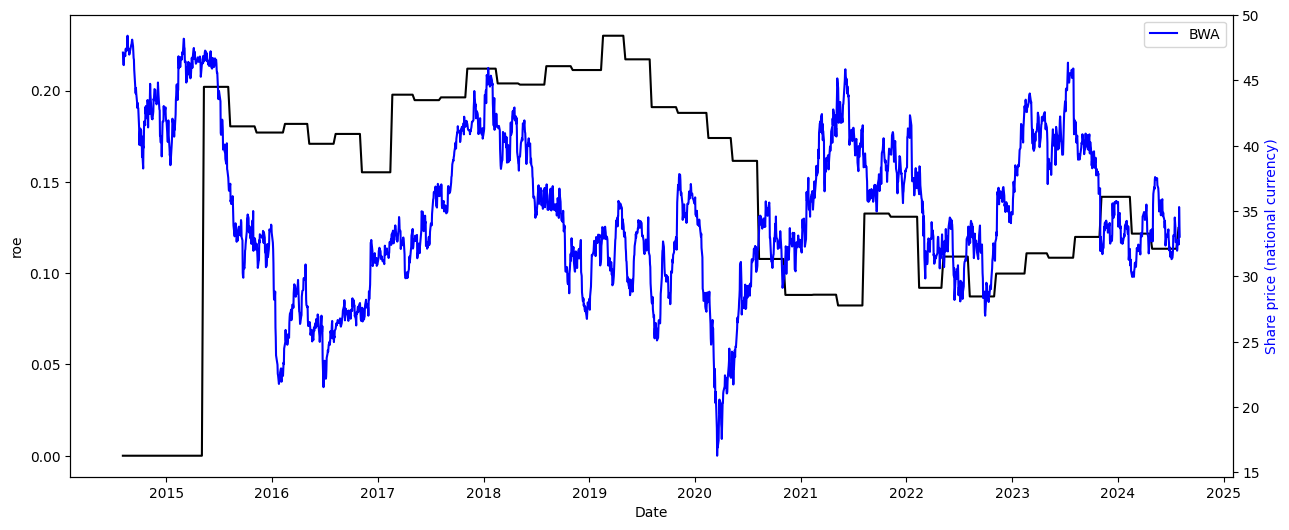

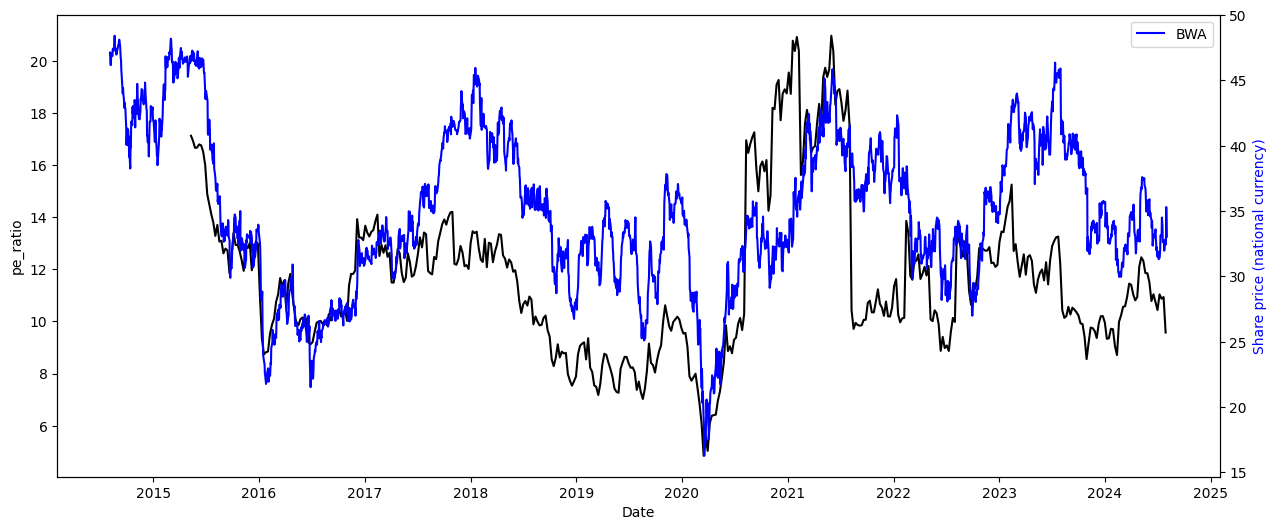

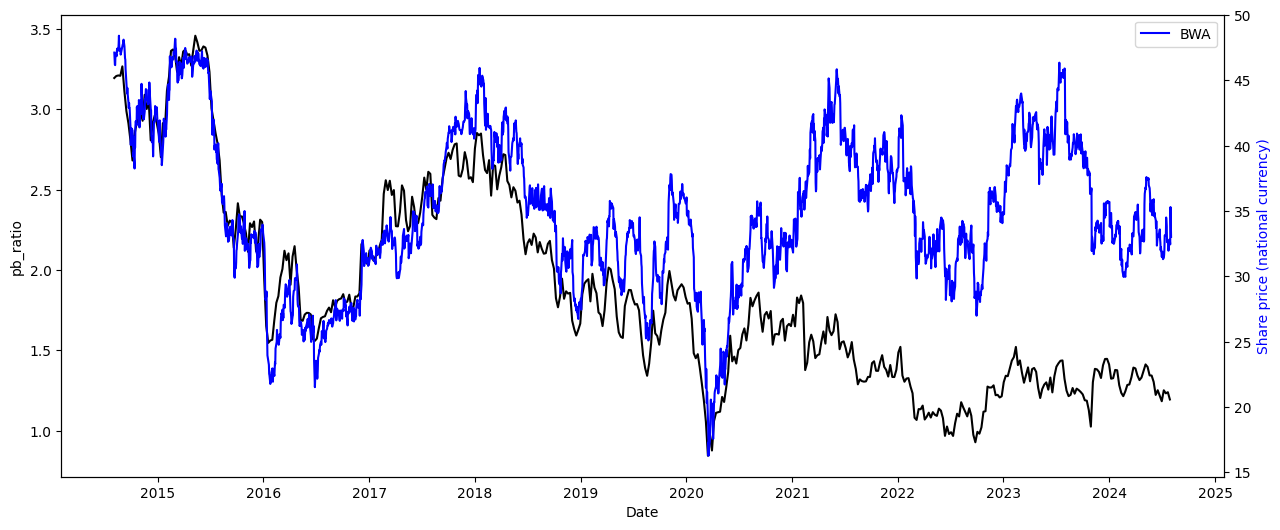

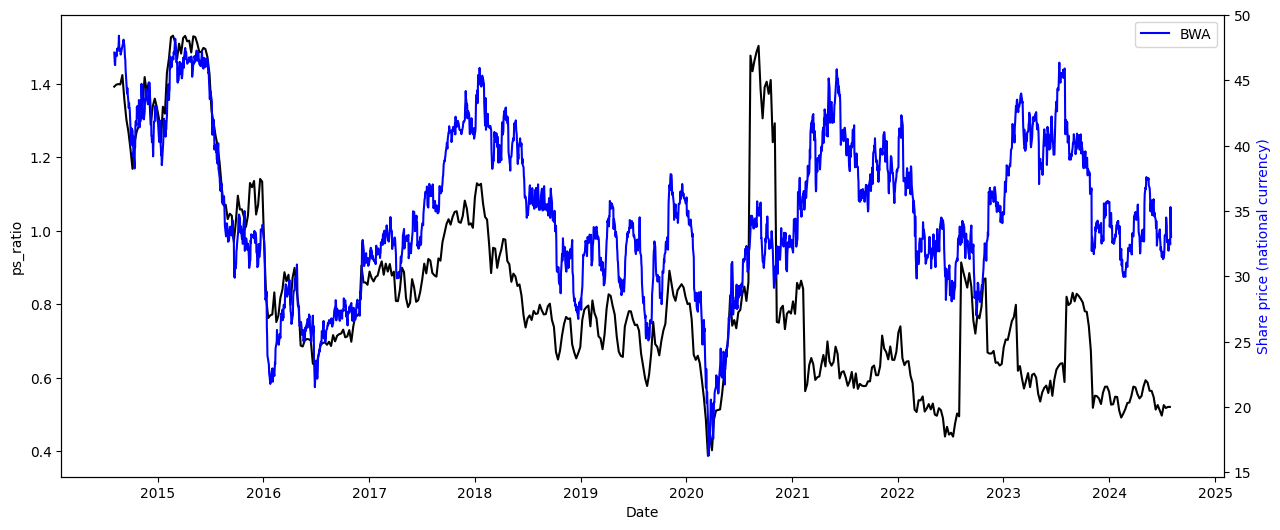

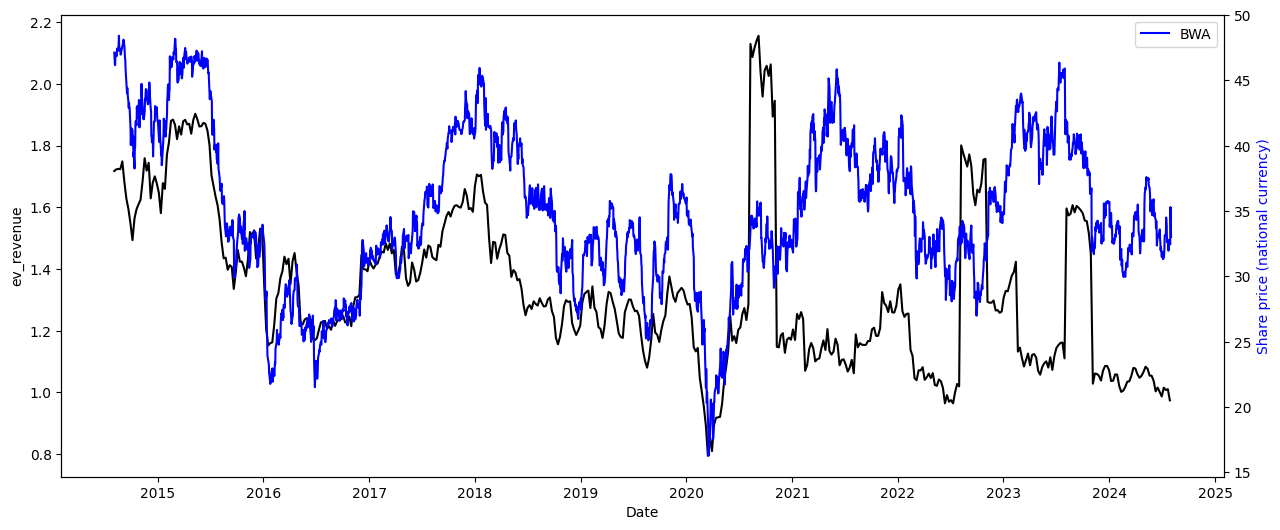

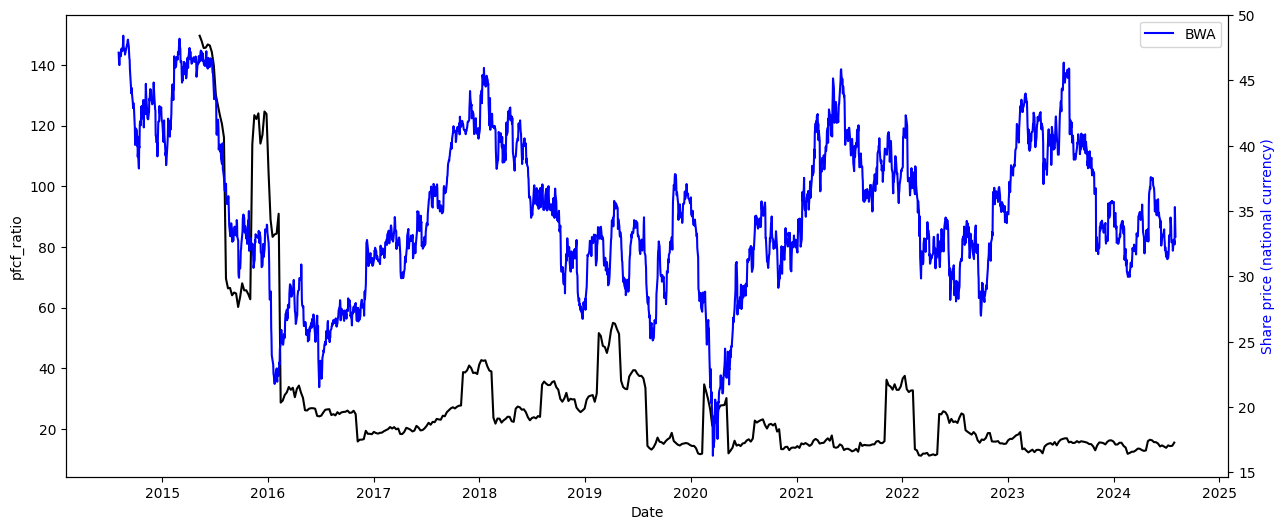

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

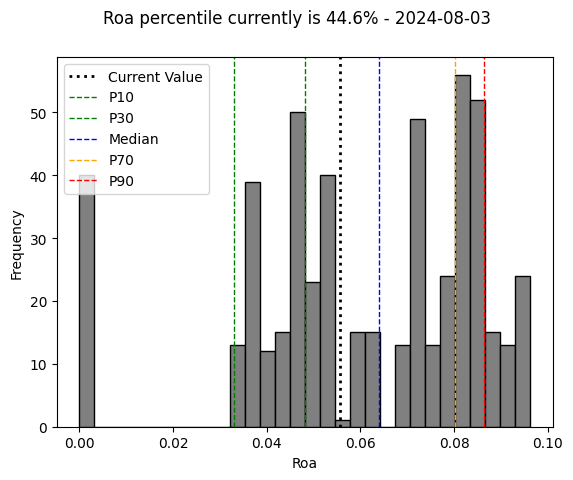

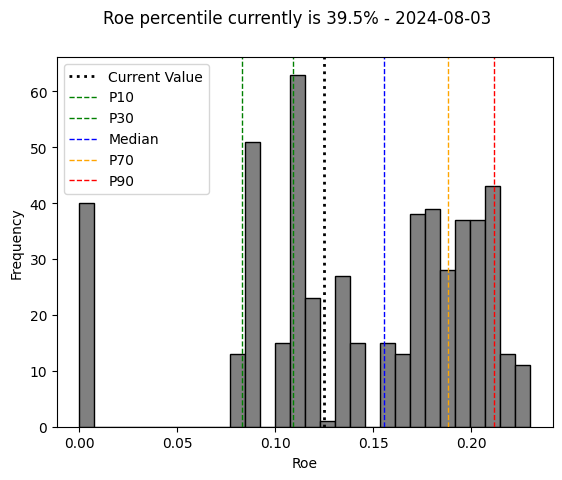

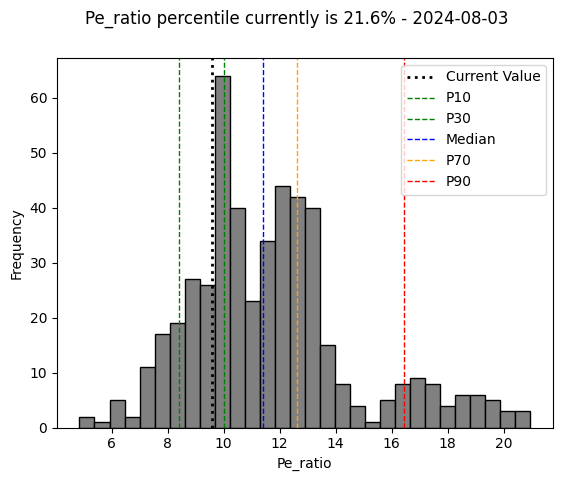

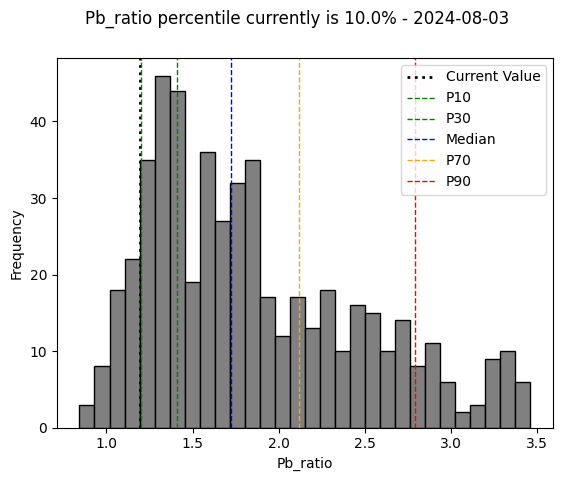

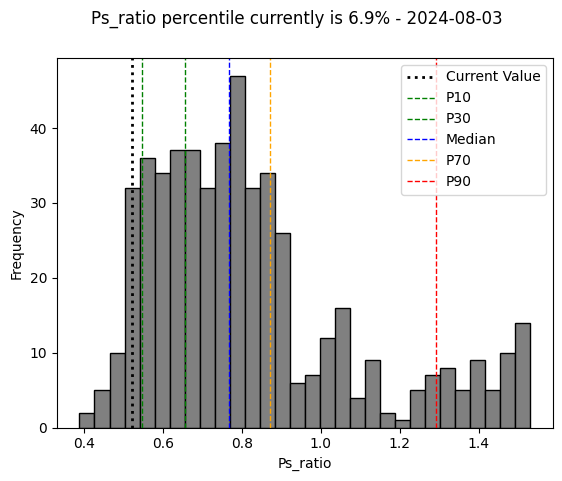

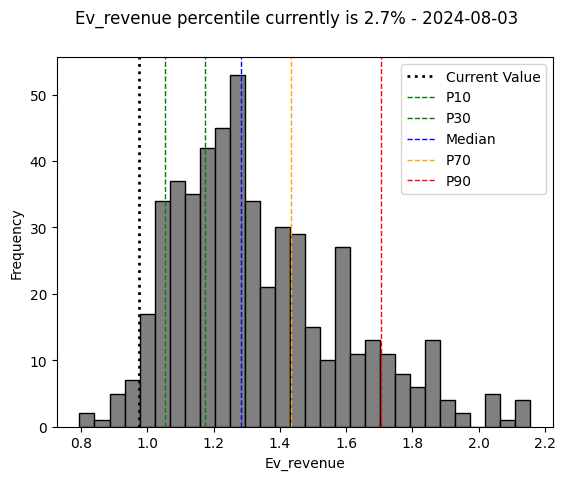

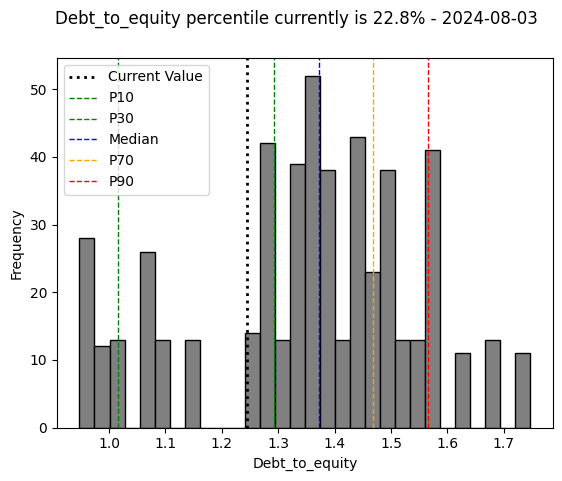

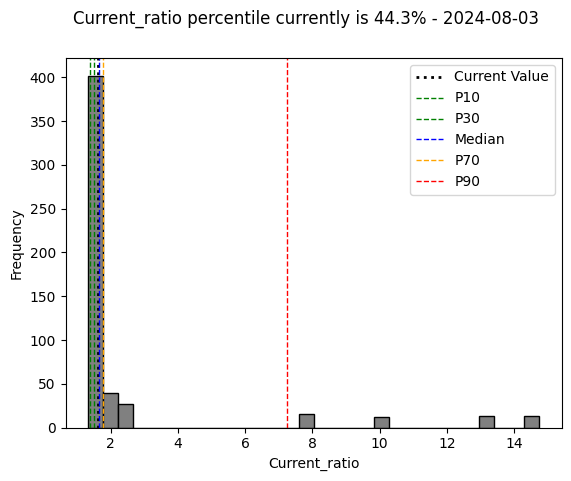

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.979662,-0.499492,-0.036323,-0.208596,-0.187934,0.315172,0.323115
roe,0.979662,1.000000,-0.469873,0.001441,-0.227431,-0.176834,0.478149,0.270179
pe_ratio,-0.499492,-0.469873,1.000000,0.288536,0.409278,0.358095,0.126395,-0.381719
pb_ratio,-0.036323,0.001441,0.288536,1.000000,0.842689,0.677209,-0.164476,-0.168398
ps_ratio,-0.208596,-0.227431,0.409278,0.842689,1.000000,0.917287,-0.439487,-0.161747
ev_revenue,-0.187934,-0.176834,0.358095,0.677209,0.917287,1.000000,-0.235394,-0.205703
debt_to_equity,0.315172,0.478149,0.126395,-0.164476,-0.439487,-0.235394,1.000000,-0.147442
current_ratio,0.323115,0.270179,-0.381719,-0.168398,-0.161747,-0.205703,-0.147442,1.000000
